# ** 1.05. Check

In [52]:
# ## 향수별로 얼마나 notes 들이 많이 사용되었는지,
# ## 빈도 그래프를 출력한다

# all_notes = sorted(all_notes.items(), key=lambda x: x[1], reverse=True)
# # all_notes
# # >>> [('musk', 412), ('jasmine', 353), ('sandalwood', 349), ('amber', 340), ....

# # len(all_notes)
# # >>> 861


# import matplotlib.pyplot as plt
# import numpy as np

# x_labels = []
# y_labels = []
# x = np.arange(len(all_notes))
# for top in all_notes:
#     x_labels.append(top[0])
#     y_labels.append(top[1])

# plt.bar(x, y_labels)
# plt.xticks(x, x_labels)
# plt.show()

AttributeError: ignored

In [53]:
## Scents 2 Notes Graph ~ sorted

# import matplotlib.pyplot as plt
# import numpy as np

# for scent in scents:
#     x = np.arange(len(puri_cutter[scent]))
#     Notes = []
#     Count = []
#     for it in puri_cutter[scent]:
#         Notes.append(it[0])
#         Count.append(it[1])

#     plt.bar(x, Count)
#     plt.xticks(x, Notes)

#     print(scent, len(puri_cutter[scent]), puri_cutter[scent])
#     plt.show()

# ** 0. Environment **

In [835]:
from google.colab import drive, files
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive'

from collections import deque
import re

import pandas as pd
import os

import numpy as np



# ** 1. Data Set **

In [836]:
## Function :: Convert text 2 list
def Category_binder(perfume, col_num):

    ## 01. 대카테고리 분류
    category = []
    if '"' not in perfume[col_num]:
        category.append(perfume[col_num])
        perfume[col_num] = category
    else:
        category.append(perfume[col_num].replace('"','').strip())
        while True:
            a_item = perfume.pop(col_num + 1)
            if '"' not in a_item:

                category.append(a_item.strip())
            else:
                category.append(a_item.replace('"','').strip())
                break
        perfume[col_num] = category


    ## 02. 카테고리 내부 단어 전처리
    new = set()
    qq = deque(perfume[col_num])
    while qq:
        item = qq.popleft().lower()
        item = item.replace('-', '').strip()
        item = item.replace('(', '').strip()
        item = item.replace(')', '').strip()
        if 'and' in item or 'with' in item or 'of' in item:
            not_and, is_and = [], False
            temp = list(item.split())
            for j in range(len(temp)):
                if temp[j] == 'and':
                    is_and = True
                    continue
                elif temp[j] == 'with':
                    is_and = True
                    continue
                elif temp[j] == 'of':
                    is_and = True
                    continue
                not_and.append(temp[j])
            if is_and:
                for k in range(len(not_and)):
                    new.add(not_and[k])
            else:
                new.add(item)
        else:
            new.add(item)
    perfume[col_num] = new
    return perfume

## Function :: Convert list 2 txt
def TextMaker(name, catego):
    text = ''
    for tt in sorted(list(catego)):
        text += str(tt)
        text += ','
    with open(name + '.txt', 'w') as f:
        f.write(text[:-2])

In [837]:
### text file for RDBS
# text = ''
# for perfume in sorted(perfumes, key=lambda x: int(x[0])):
#     temp = '['
#     for item in perfume:
#         temp += "'"
#         temp += str(item)
#         temp += "'"
#         temp += '@'
#     text += temp 
#     text += ']'
#     text += '_'
# with open('Purified_dataset5' + '.txt', 'w') as f:
#     f.write(text[:-2])

In [838]:
## 01. 파일 읽기
perfumes_dataset = open("/content/noon_perfumes_dataset.csv")
perfumes_dataset = perfumes_dataset.read()
perfumes_dataset = perfumes_dataset.replace('\n', ',').split(',')
perfumes = [] 
perfumes_tag = perfumes_dataset[:15]
perfumes_data = perfumes_dataset[15:]


## 02. 향수 별로 구분하기 ...  perfumes : [ [향수1], [향수2], ....]
idx = '1'
perfume_now = []
for data in perfumes_data:
    if data == idx:
        idx = str(int(idx) + 1)
        perfumes.append(perfume_now)
        perfume_now = []
    perfume_now.append(data)
perfumes.append(perfume_now)


## 03. 향수 내 대분류 정리
for perfume in perfumes:
    ## 03-1. old_price / new_price / ml -->> str2float
    perfume[3], perfume[4], perfume[5] = float(perfume[3]), float(perfume[4]), float(perfume[5])

    ## 03-2. scents - col no. 8
    perfume = Category_binder(perfume, 8)

    ## 03-3. base_note - col no. 9
    perfume = Category_binder(perfume, 9)

    ## 03-4. middle_note - col no. 10
    perfume = Category_binder(perfume, 10)

    ## 03-5. item_rating -->> str2float
    perfume[11] = float(perfume[11])


## 04. 향수 데이터 형식
# 0.no, 1.brand, 2.name, 3.old_price, 4.new_price, 5.mL, 6.Time_category, 7.gender, 8.Top, 9.base, 10.middle, 11.rating
all_brands = set()              # 01    150
all_names = set()               # 02    589
brand_plus_name = set()        #################
all_concentrations = set()      # 06    5
all_departments = set()         # 07    4
all_scents = set()              # 08    18
all_bases = set()               # 09    426
all_middles = set()             # 10    606

for perfume in perfumes:
    all_brands.add(perfume[1].lower())
    all_names.add(perfume[2].lower())
    brand_plus_name.add((perfume[1].lower(), perfume[2].lower()))
    all_concentrations.add(perfume[6].lower())
    all_departments.add(perfume[7].lower())
    for pt in perfume[8]:
        all_scents.add(pt.lower())
    for pb in perfume[9]:
        all_bases.add(pb.lower())
    for pm in perfume[10]:
        all_middles.add(pm.lower())

In [839]:
scents = sorted(list(all_scents))
notes = sorted(list(all_middles | all_bases))[5:]

In [840]:
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Top_scents 하나 당 포함하는 notes 종류
# 0.no, 1.brand, 2.name, 3.old_price, 4.new_price, 5.mL, 6.Time_category, 7.gender, 8.Top, 9.base, 10.middle, 11.rating
scents2notes = {}
for top in all_scents:
    scents2notes[top] = [set(), set(), set()]
    for perfume in perfumes:
        if top in perfume[8]:
            for pm in perfume[10]:
                scents2notes[top][0].add(pm)
            for pb in perfume[9]:
                scents2notes[top][1].add(pb)
            scents2notes[top][2] = scents2notes[top][0] | scents2notes[top][1]
    # print(top, scents2notes[top])
    # >>> floral [{'', 'hibiscus seed', 'coriander', 'pearlescent', 'dewy english roses',.......}]

In [841]:
### ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Top_scent 1 개에 포함되어 있는 notes 전체
top2notes_cnt = {}
all_notes = {}
for scent in scents:
    temp = {}
    for perfume in perfumes:
        if scent in perfume[8]:
            now_all = perfume[10] | perfume[9]
            for now in now_all:
                if now == 'lilyofthevalley':
                    now = 'lily of the valley'
                if now in temp:
                    temp[now] += 1
                else:
                    temp[now] = 1
                if now in all_notes:
                    all_notes[now] += 1
                else:
                    all_notes[now] = 1
    top2notes_cnt[scent] = sorted(temp.items(), key=lambda x: x[1], reverse=True)

# for scent in scents:
#     print(scent, len(top2notes_cnt[scent]), top2notes_cnt[scent])
# >>> arabian 176 [('vanilla', 28), ('musk', 25), ('amber', 23), ('sandalwood', 22), ('tonka bean', 22), ('patchouli', 21), ....

In [842]:
all_notes = sorted(all_notes.items(), key=lambda x: x[1], reverse=True)

# ** 2. Data purification

In [843]:
## 안 쓰이는 notes 들 제거하기
puri_notes = []
for top in all_notes:
    note, cnt = top
    if cnt >= 10:
        puri_notes.append(note)

In [844]:
## Sparse 2 Densee
puri_notes = set()
puri_cutter =top2notes_cnt
for top in puri_cutter:
    temp = []
    for sc, cnt in puri_cutter[top]:
        if cnt >= 3:
            puri_notes.add(sc)
            temp.append((sc, cnt))
    puri_cutter[top] = temp

# for scent in scents:
#     print(scent, len(puri_cutter[scent]), puri_cutter[scent])
# >>> arabian 51 [('vanilla', 28), ('musk', 25), ('amber', 23), ('sandalwood', 22), ...


puri_notes = sorted(list(puri_notes)[:-1])
# print(len(puri_notes))
# puri_notes
# >>> 240
# >>> ['accord', 'accords', 'african orange flower', 'agarwood', 'almond',...

In [845]:
### !!!! 실제 데이터 구성 !!! ###
## 현재 - puri_notes(240) @ scents(11)
Data_x = [[0.005] * len(puri_notes) for _ in range(len(perfumes))]
Data_y = [[0] * len(scents) for _ in range(len(perfumes))]
for i in range(len(perfumes)):
    perfume = perfumes[i]
    data_x = list(perfume[10] | perfume[9])
    data_y = list(perfume[8])[0]
    for data in data_x:
        if data not in puri_notes:
            continue
        Data_x[i][puri_notes.index(data)] = 1.00
    Data_y[i][scents.index(data_y)] = 1

In [846]:
### !!!! 실제 데이터 구성 !!! ###
x_all = np.array(Data_x)
y_all = np.array(Data_y)
# x_train, x_test = x_all[:800], x_all[801:]
# y_train, y_test = y_all[:800], y_all[801:]

# print(x_train.shape)
# print(y_train.shape)
print(x_all.shape)
print(y_all.shape)


(1003, 240)
(1003, 11)


In [847]:
x_all

array([[0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
       [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
       [0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005],
       ...,
       [0.005, 0.005, 0.005, ..., 0.005, 1.   , 0.005],
       [0.005, 0.005, 0.005, ..., 0.005, 1.   , 0.005],
       [0.005, 0.005, 0.005, ..., 0.005, 1.   , 0.005]])

In [848]:
all_notes

[('musk', 412),
 ('jasmine', 353),
 ('sandalwood', 349),
 ('amber', 340),
 ('patchouli', 324),
 ('vanilla', 289),
 ('rose', 236),
 ('cedar', 232),
 ('vetiver', 171),
 ('geranium', 112),
 ('tonka bean', 95),
 ('oakmoss', 89),
 ('iris', 76),
 ('violet', 71),
 ('tuberose', 70),
 ('lily', 70),
 ('leather', 69),
 ('ylangylang', 67),
 ('lavender', 67),
 ('sage', 61),
 ('cardamom', 60),
 ('cinnamon', 57),
 ('benzoin', 54),
 ('nutmeg', 54),
 ('gardenia', 53),
 ('tonka', 47),
 ('orange blossom', 46),
 ('peony', 46),
 ('wood', 45),
 ('woody', 45),
 ('incense', 42),
 ('white musk', 40),
 ('pepper', 39),
 ('lily of the valley', 38),
 ('peach', 38),
 ('heliotrope', 37),
 ('the', 37),
 ('carnation', 36),
 ('valley', 36),
 ('apple', 34),
 ('ginger', 34),
 ('woody notes', 34),
 ('cashmere wood', 33),
 ('orange', 33),
 ('white', 33),
 ('moss', 32),
 ('coriander', 32),
 ('labdanum', 31),
 ('freesia', 31),
 ('notes', 31),
 ('honey', 29),
 ('cedarwood', 29),
 ('tonka beans', 28),
 ('ambroxan', 28),
 ('mag

# ** 3. Classification model **

In [849]:
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling1D

c_model = keras.Sequential()

c_model.add(Dense(128, activation='relu'))
c_model.add(Dense(64, activation='relu'))
c_model.add(Dense(11, activation='softmax'))

In [850]:
c_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [851]:
# history = c_model.fit(x_train, y_train, epochs=20, validation_split=0.2, batch_size=10)
history = c_model.fit(x_all, y_all, epochs=20, batch_size=20, shuffle=True, validation_split=0.2)

Epoch 1/20
41/41 [==============================] - 1s 12ms/step - loss: 2.2389 - accuracy: 0.2307 - val_loss: 2.0860 - val_accuracy: 0.3234
Epoch 2/20
41/41 [==============================] - 0s 7ms/step - loss: 1.9101 - accuracy: 0.3678 - val_loss: 1.9335 - val_accuracy: 0.3881
Epoch 3/20
41/41 [==============================] - 0s 4ms/step - loss: 1.7276 - accuracy: 0.4439 - val_loss: 1.8242 - val_accuracy: 0.3930
Epoch 4/20
41/41 [==============================] - 0s 4ms/step - loss: 1.5659 - accuracy: 0.4925 - val_loss: 1.7484 - val_accuracy: 0.4129
Epoch 5/20
41/41 [==============================] - 0s 4ms/step - loss: 1.4205 - accuracy: 0.5387 - val_loss: 1.6532 - val_accuracy: 0.4627
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 1.2673 - accuracy: 0.5935 - val_loss: 1.6318 - val_accuracy: 0.4776
Epoch 7/20
41/41 [==============================] - 0s 5ms/step - loss: 1.1262 - accuracy: 0.6471 - val_loss: 1.5898 - val_accuracy: 0.5174
Epoch 8/20
41/41 [=

In [852]:
# loss_test, acc_test = c_model.evaluate(x_test, y_test)
loss_test, acc_test = c_model.evaluate(x_all, y_all)

print(loss_test)
print(acc_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.6006 - accuracy: 0.8644
0.6006319522857666
0.8644067645072937


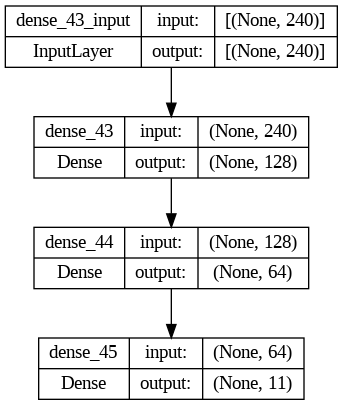

In [853]:
keras.utils.plot_model(c_model, show_shapes=True)

In [854]:
c_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 128)               30848     
                                                                 
 dense_44 (Dense)            (None, 64)                8256      
                                                                 
 dense_45 (Dense)            (None, 11)                715       
                                                                 
Total params: 39,819
Trainable params: 39,819
Non-trainable params: 0
_________________________________________________________________


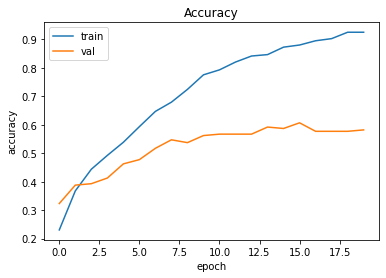

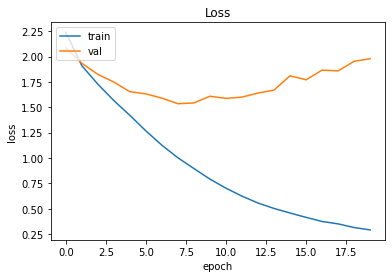

In [855]:
# 10. 학습 시각화하기
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [856]:
arr0 = c_model.predict(x_all[0].reshape(1,-1))
arr0

1/1 [==============================] - 0s 76ms/step


array([[1.7130933e-05, 2.6904594e-03, 1.2537012e-05, 1.2142706e-03,
        5.9967206e-06, 2.4015446e-05, 4.9812868e-05, 1.2528294e-04,
        1.1249015e-04, 2.0419475e-06, 9.9574596e-01]], dtype=float32)

# ** 4. Auto-Encoder model **


In [882]:
import keras
from keras import layers
input_dim = 240

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(input_dim,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [883]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)

In [884]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [885]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [886]:
# from keras.datasets import mnist
# import numpy as np
# (x_train, _), (x_test, _) = mnist.load_data()

In [734]:
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
# x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# print(x_train.shape)
# print(x_test.shape)

In [887]:
print(x_all.shape)
print(y_all.shape)

(1003, 240)
(1003, 11)


In [888]:
history = autoencoder.fit(x_all, x_all,
                epochs=100,
                batch_size=20,
                shuffle=True,
                validation_split=0.2)

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 0.6403 - accuracy: 0.0000e+00 - val_loss: 0.5420 - val_accuracy: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.0486 - val_loss: 0.2388 - val_accuracy: 0.0647
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1894 - accuracy: 0.0486 - val_loss: 0.1548 - val_accuracy: 0.0597
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.0349 - val_loss: 0.1407 - val_accuracy: 0.0498
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.0499 - val_loss: 0.1370 - val_accuracy: 0.0995
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.2170 - val_loss: 0.1355 - val_accuracy: 0.1045
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.1363 - accuracy: 0.0461 - val_loss: 0.1340 - val_accuracy: 0.1244
Epoch

In [897]:
# Encode and decode some digits
# Note that we take them from the *test* set
encoded_imgs = encoder.predict(x_all)
decoded_imgs = decoder.predict(encoded_imgs)

32/32 [==============================] - 0s 1ms/step


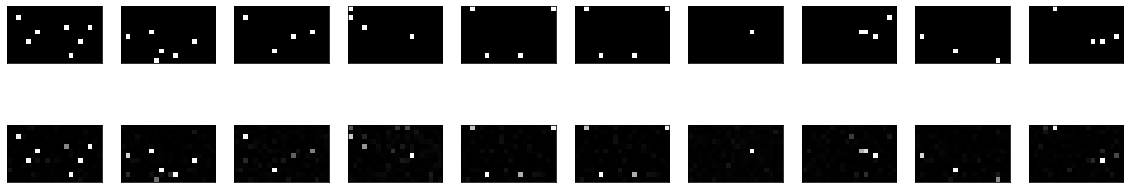

In [920]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_all[i].reshape(12, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(12, -1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

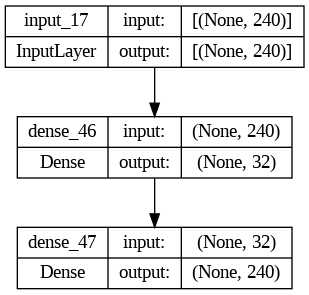

In [899]:
keras.utils.plot_model(autoencoder, show_shapes=True)

In [921]:
print(decoded_imgs[0].max())
print(decoded_imgs[0].min())

0.99952084
3.3482735e-05


In [922]:
c_model.evaluate(x_all, y_all)

32/32 [==============================] - 0s 2ms/step - loss: 0.6006 - accuracy: 0.8644


[0.6006319522857666, 0.8644067645072937]

In [923]:
c_model.evaluate(decoded_imgs, y_all)

32/32 [==============================] - 0s 2ms/step - loss: 0.8785 - accuracy: 0.7178


[0.878544807434082, 0.7178464531898499]

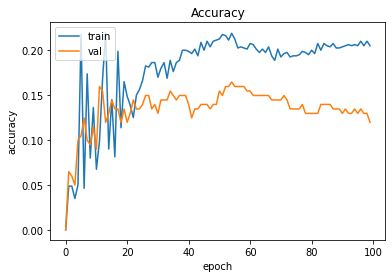

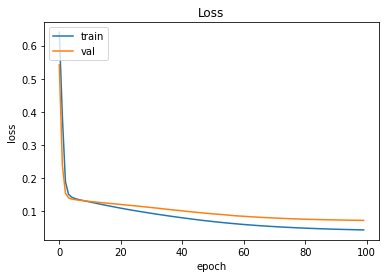

In [903]:
# 10. 학습 시각화하기
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

# 05. Recommend

In [ ]:
# for i in range(len(x_all[0])):
#     if x_all[224][i] > 0.5:
#         print(puri_notes[i])

In [904]:
# encoded_imgs = encoder.predict(x_all)
# decoded_imgs = decoder.predict(encoded_imgs)

32/32 [==============================] - 0s 1ms/step


In [872]:
#### classification 모델 사용
# temp = c_model.predict(x_all[0].reshape(1,-1))
# for idx in [109, 969]:
#     temp = np.concatenate((temp, c_model.predict(x_all[i].reshape(1,-1))), axis=0)
# temp.shape

1/1 [==============================] - 0s 23ms/step


(3, 11)

In [924]:
### 인코더 사용
temp = encoded_imgs[0].reshape(1, -1)
for idx in [109, 969]:
    temp = np.concatenate((temp, encoded_imgs[i].reshape(1, -1)), axis=0)
temp.shape

(3, 32)

In [974]:
temp = encoded_imgs[791].reshape(1, -1)

In [975]:
import numpy as np


class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """

        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        # self._P = np.random.normal(size=(self._num_users, self._k))
        # self._Q = np.random.normal(size=(self._num_items, self._k))
        self._P = temp
        self._Q = np.full((self._num_items, self._k), 0.001)


        # init biases
        # self._b_P = np.zeros(self._num_users)
        # self._b_Q = np.zeros(self._num_items)
        # self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):

            # rating이 존재하는 index를 기준으로 training
            for i in range(self._num_users):
                for j in range(self._num_items):
                    if self._R[i, j] > 0:
                        self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - predicted[x, y], 2)
        return np.sqrt(cost) / len(xi)


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        # self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        # self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        # self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        # return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)
        return self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        # return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)
        return self._P.dot(self._Q.T)


    def print_results(self):
        """
        print fit results
        """

        print("User Latent P:")
        print(self._P)
        print("Item Latent Q:")
        print(self._Q.T)
        print("P x Q:")
        print(self._P.dot(self._Q.T))
        # print("bias:")
        # print(self._b)
        # print("User Latent bias:")
        # print(self._b_P)
        # print("Item Latent bias:")
        # print(self._b_Q)
        print("Final R matrix:")
        print(self.get_complete_matrix())
        print("Final RMSE:")
        print(self._training_process[self._epochs-1][1])
        return (self._Q)


# run example
if __name__ == "__main__":
    # rating matrix - User X Item : (7 X 5)
    R = np.array([
        [8],
    ])

    # P, Q is (7 X k), (k X 5) matrix
    factorizer = MatrixFactorization(R, k=32, learning_rate=0.01, reg_param=0.01, epochs=500, verbose=True)
    factorizer.fit()
    personalized = factorizer.print_results()

Iteration: 10 ; cost = 0.0009
Iteration: 20 ; cost = 0.0009
Iteration: 30 ; cost = 0.0009
Iteration: 40 ; cost = 0.0009
Iteration: 50 ; cost = 0.0009
Iteration: 60 ; cost = 0.0009
Iteration: 70 ; cost = 0.0009
Iteration: 80 ; cost = 0.0009
Iteration: 90 ; cost = 0.0009
Iteration: 100 ; cost = 0.0009
Iteration: 110 ; cost = 0.0009
Iteration: 120 ; cost = 0.0009
Iteration: 130 ; cost = 0.0009
Iteration: 140 ; cost = 0.0009
Iteration: 150 ; cost = 0.0009
Iteration: 160 ; cost = 0.0009
Iteration: 170 ; cost = 0.0009
Iteration: 180 ; cost = 0.0009
Iteration: 190 ; cost = 0.0009
Iteration: 200 ; cost = 0.0009
Iteration: 210 ; cost = 0.0009
Iteration: 220 ; cost = 0.0009
Iteration: 230 ; cost = 0.0009
Iteration: 240 ; cost = 0.0009
Iteration: 250 ; cost = 0.0009
Iteration: 260 ; cost = 0.0009
Iteration: 270 ; cost = 0.0009
Iteration: 280 ; cost = 0.0009
Iteration: 290 ; cost = 0.0009
Iteration: 300 ; cost = 0.0009
Iteration: 310 ; cost = 0.0009
Iteration: 320 ; cost = 0.0009
Iteration: 330 ; 

In [976]:
# print(personalized)
print(personalized.shape)

(1, 32)


In [948]:
### classification model 사용
# new_perfume = c_model.predict(x_all[224].reshape(1,-1))
# print(new_perfume.dot(personalized.T))

In [977]:
alll = []
idxl = []
for i in range(1003):
    new_perfume = encoded_imgs[i].reshape(1, -1)
    now = new_perfume.dot(personalized.T)
    alll.append(now)

In [950]:
### classification model 사용
# alll = []
# for i in range(1003):
#     new_perfume = c_model.predict(x_all[i].reshape(1,-1))
#     alll.append(new_perfume.dot(personalized.T))

In [978]:
target_perfume = encoded_imgs[626].reshape(1, -1)
print(target_perfume.dot(personalized.T))

[[3.92628375]]


In [952]:
target_perfume = encoded_imgs[47].reshape(1, -1)
print(target_perfume.dot(personalized.T))

[[0.75617957]]


In [953]:
target_perfume = encoded_imgs[632].reshape(1, -1)
print(target_perfume.dot(personalized.T))

[[0.93645005]]


In [979]:
alll.sort(reverse=True)

In [955]:
idxl

[]

In [956]:
perfumes[904]

['904',
 'Roberto',
 'Paradiso Assoluto',
 515.0,
 127.65,
 75.0,
 'EDP',
 'Women',
 {'floral'},
 {'cashmeran', 'patchouli', 'sandalwood', 'vanilla'},
 {'passionfruit', 'red lily', 'wild jasmine'},
 4.5,
 'noon',
 '4.2',
 '98.1K']

In [968]:
perfumes[791]

['791',
 'VERSACE',
 'Crystal Noir',
 27.0,
 16.2,
 5.0,
 'EDT',
 'Women',
 {'arabian'},
 {'amber', 'musk', 'sandalwood'},
 {'gardenia', 'orange blossom', 'peony'},
 4.4,
 'noon',
 '4.2',
 '98.1K']

In [958]:
perfumes[224]

['224',
 'joop',
 'Homme',
 170.0,
 57.0,
 125.0,
 'EDT',
 'Men',
 {'citrus'},
 {'patchouli', 'sandalwood', 'tonka beans', 'vanilla'},
 {'cardamom', 'cinnamon', 'heliotrope', 'jasmine', 'lily', 'the', 'valley'},
 4.2,
 'Cute Shop',
 '4.2',
 '98']

In [959]:
alll.index(target_perfume.dot(personalized.T))

251

In [960]:
alll.index(target_perfume.dot(personalized.T))

251

In [980]:
alll[:40]

[array([[13.78388955]]),
 array([[13.78388955]]),
 array([[13.78388955]]),
 array([[13.78388955]]),
 array([[13.78388955]]),
 array([[10.63940674]]),
 array([[10.63940674]]),
 array([[10.63940674]]),
 array([[10.22807479]]),
 array([[10.22807479]]),
 array([[10.22807479]]),
 array([[10.08218485]]),
 array([[10.08218485]]),
 array([[9.81438436]]),
 array([[9.81438436]]),
 array([[9.6818941]]),
 array([[9.6818941]]),
 array([[9.15993029]]),
 array([[8.98715459]]),
 array([[8.97827082]]),
 array([[8.60527776]]),
 array([[8.60527776]]),
 array([[8.60527776]]),
 array([[8.59151752]]),
 array([[8.50114723]]),
 array([[8.46476075]]),
 array([[8.37321797]]),
 array([[8.37321797]]),
 array([[8.37321797]]),
 array([[8.34164088]]),
 array([[8.34164088]]),
 array([[8.30999775]]),
 array([[8.14346785]]),
 array([[8.14346774]]),
 array([[8.11169786]]),
 array([[8.11169786]]),
 array([[8.11077277]]),
 array([[8.02145919]]),
 array([[8.01845969]]),
 array([[8.01845969]])]

In [ ]:
 ``